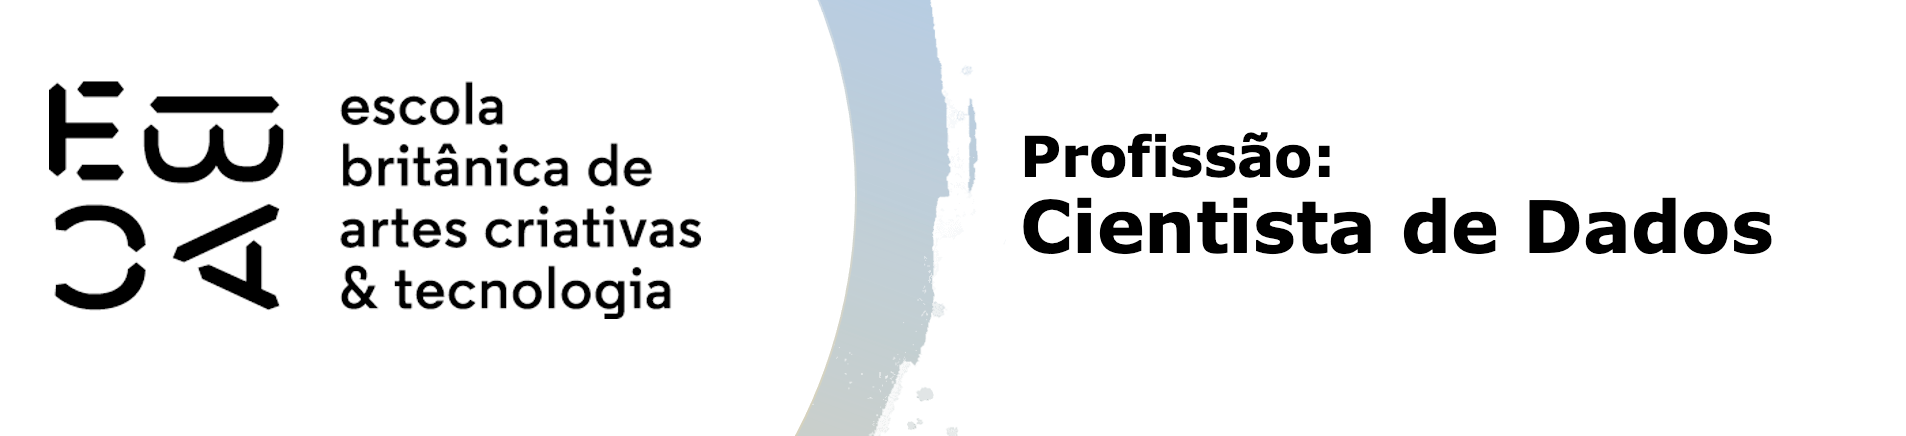

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carregando a base de dados
caminho_arquivo = 'base_nfp.pkl'
dados = pd.read_pickle(caminho_arquivo)

# Exibindo as primeiras linhas do DataFrame
dados.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [5]:
# Convertendo a coluna 'Data Emissão' para o formato datetime
dados['Data Emissão'] = pd.to_datetime(dados['Data Emissão'], errors='coerce')

# Dia da semana (segunda-feira=0, domingo=6)
dados['dia_semana'] = dados['Data Emissão'].dt.dayofweek

# Dummy para fim de semana (1 se sábado ou domingo, 0 caso contrário)
dados['fim_de_semana'] = dados['dia_semana'].apply(lambda x: 1 if x >= 5 else 0)

# Dia do mês
dados['dia_do_mes'] = dados['Data Emissão'].dt.day

# Trimestre
dados['trimestre'] = dados['Data Emissão'].dt.quarter

# Exibindo as primeiras linhas para verificar as novas variáveis
dados_temporal = dados[['Data Emissão', 'dia_semana', 'fim_de_semana', 'dia_do_mes', 'trimestre']].head()
dados_temporal

,Data Emissão,dia_semana,fim_de_semana,dia_do_mes,trimestre
0,2017-06-30,4,0,30,2
1,2017-06-30,4,0,30,2
2,2017-06-30,4,0,30,2
3,2017-06-30,4,0,30,2
4,2017-06-30,4,0,30,2


In [6]:
# Criando categorizações da variável 'Valor NF' utilizando quantis

# 5 categorias (quintis)
dados['valor_nf_quintis'] = pd.qcut(dados['Valor NF'], 5, labels=False)

# 10 categorias (decilis)
dados['valor_nf_decilis'] = pd.qcut(dados['Valor NF'], 10, labels=False)

# 20 categorias (vigintis)
dados['valor_nf_vigintis'] = pd.qcut(dados['Valor NF'], 20, labels=False)

# 50 categorias (percentis)
dados['valor_nf_percentis'] = pd.qcut(dados['Valor NF'], 50, labels=False)

# Exibindo as primeiras linhas para verificar as novas variáveis
dados_categorias = dados[['Valor NF', 'valor_nf_quintis', 'valor_nf_decilis', 'valor_nf_vigintis', 'valor_nf_percentis']].head()
dados_categorias

,Valor NF,valor_nf_quintis,valor_nf_decilis,valor_nf_vigintis,valor_nf_percentis
0,24.68,1,3,7,17
1,50.00,2,5,11,28
2,27.00,1,3,7,19
3,111.50,3,7,15,38
4,125.00,3,7,15,39


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [8]:
# Função para calcular o Information Value (IV)
def calcular_iv(df, feature, target, bins=10):
    # Calculando a frequência da variável categórica
    df['bin'] = pd.qcut(df[feature], bins, duplicates='drop')
    
    # Calculando a distribuição de bons e maus pagadores
    iv_df = df.groupby('bin').agg({
        target: ['count', 'sum']
    })
    iv_df.columns = ['total', 'bad']
    iv_df['good'] = iv_df['total'] - iv_df['bad']
    
    # Calculando as proporções
    iv_df['good_dist'] = iv_df['good'] / iv_df['good'].sum()
    iv_df['bad_dist'] = iv_df['bad'] / iv_df['bad'].sum()
    
    # Calculando o IV
    iv_df['woe'] = np.log(iv_df['good_dist'] / iv_df['bad_dist'])
    iv_df['iv'] = (iv_df['good_dist'] - iv_df['bad_dist']) * iv_df['woe']
    
    # Soma do IV
    iv = iv_df['iv'].sum()
    
    return iv

# Aplicando a função nas variáveis criadas
variaveis = ['dia_semana', 'fim_de_semana', 'dia_do_mes', 'trimestre',
             'valor_nf_quintis', 'valor_nf_decilis', 'valor_nf_vigintis', 'valor_nf_percentis']

iv_dict = {}
for var in variaveis:
    iv_dict[var] = calcular_iv(dados, var, 'flag_credito')

# Exibindo os valores de Information Value
iv_dict

C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_17448\3245804295.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iv_df = df.groupby('bin').agg({
C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_17448\3245804295.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iv_df = df.groupby('bin').agg({
C:\Users\Matheus Cerqueira\AppData\Local\Temp\ipykernel_17448\3245804295.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

{'dia_semana': 0.0068825023804876765,
 'fim_de_semana': 0.0,
 'dia_do_mes': 0.030917146234225316,
 'trimestre': 0.011459953835600379,
 'valor_nf_quintis': 0.014929445088375112,
 'valor_nf_decilis': 0.07025869404364504,
 'valor_nf_vigintis': 0.10664979368195976,
 'valor_nf_percentis': 0.10664979368195976}

In [12]:
iv_df = pd.DataFrame(list(iv_dict.items()), columns=['Variável', 'Information Value'])

# Exibindo a tabela
iv_df

,Variável,Information Value
0,dia_semana,0.006883
1,fim_de_semana,0.000000
2,dia_do_mes,0.030917
3,trimestre,0.011460
4,valor_nf_quintis,0.014929
5,valor_nf_decilis,0.070259
6,valor_nf_vigintis,0.106650
7,valor_nf_percentis,0.106650


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

As variáveis que apresentam maior poder de discriminação, segundo o Information Value (IV), são:

-> valor_nf_vigintis (IV = 0.1066)
-> valor_nf_percentis (IV = 0.1066)
-> valor_nf_decilis (IV = 0.0703)

Sim, parece haver uma relação entre o número de categorias utilizadas para categorizar variáveis contínuas e o Information Value (IV). Na análise que fizemos com a variável contínua Valor NF, observamos que:

Quando utilizamos 5 categorias (quintis), o IV foi de 0.0149.
Com 10 categorias (decilis), o IV aumentou para 0.0703.
Ao utilizar 20 categorias (vigintis), o IV aumentou ainda mais para 0.1066.
Com 50 categorias (percentis), o IV manteve-se no mesmo valor de 0.1066.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

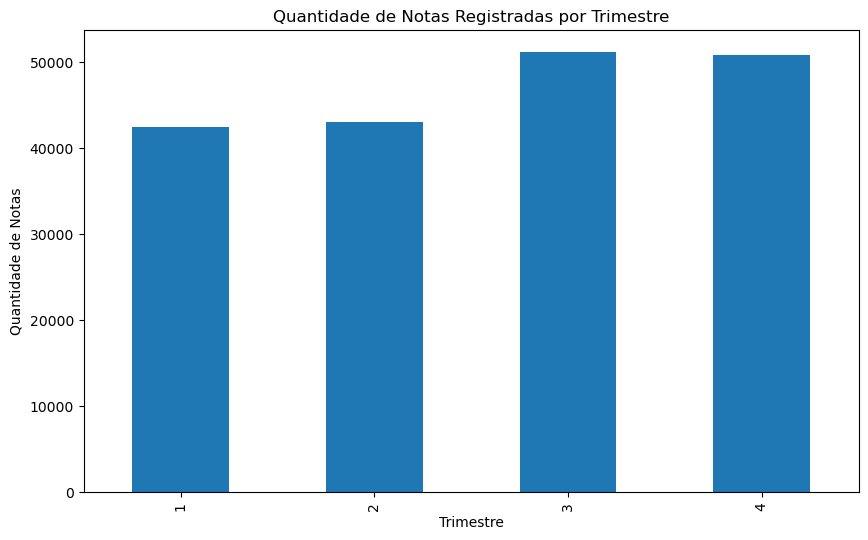

In [14]:
# Contagem de notas por trimestre
contagem_notas_trimestre = dados.groupby('trimestre').size()

# Plotando a quantidade de notas por trimestre
plt.figure(figsize=(10, 6))
contagem_notas_trimestre.plot(kind='bar')
plt.title('Quantidade de Notas Registradas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.show()

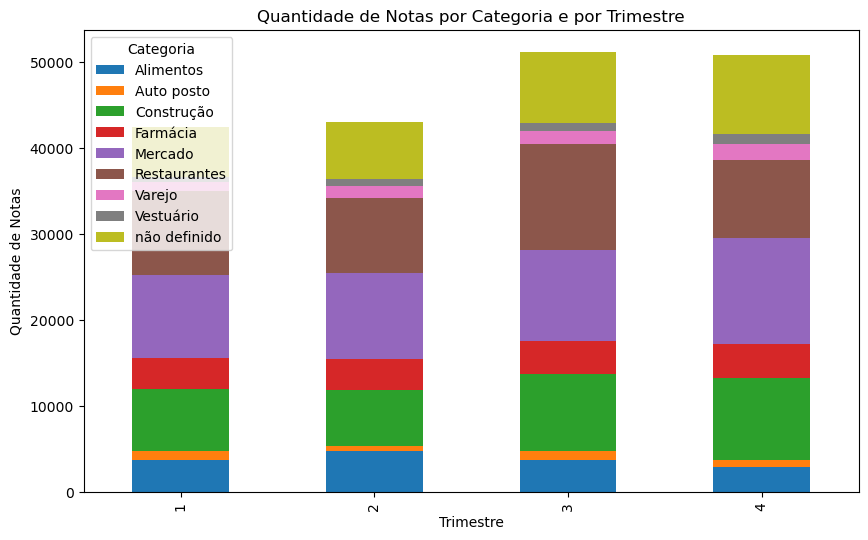

In [15]:
# Contagem de notas por categoria e por trimestre
contagem_notas_categoria_trimestre = dados.groupby(['trimestre', 'categoria']).size().unstack()

# Plotando a quantidade de notas por categoria e por trimestre
contagem_notas_categoria_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Quantidade de Notas por Categoria e por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.legend(title='Categoria')
plt.show()

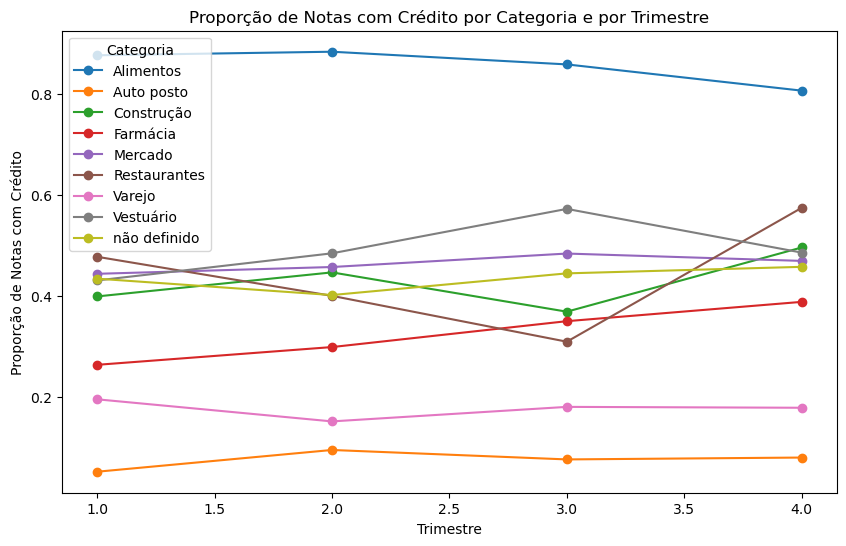

In [16]:
# Proporção de notas com crédito por categoria e por trimestre
proporcao_credito_categoria_trimestre = dados.groupby(['trimestre', 'categoria'])['flag_credito'].mean().unstack()

# Plotando a proporção de notas com crédito por categoria e por trimestre
proporcao_credito_categoria_trimestre.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Proporção de Notas com Crédito por Categoria e por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.legend(title='Categoria')
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [18]:
# Função para calcular WOE e IV
def calcular_woe_iv(df, feature, target):
    # Agrupando por categoria e calculando as distribuições de bons e maus
    iv_df = df.groupby(feature).agg({
        target: ['count', 'sum']
    })
    iv_df.columns = ['total', 'bad']
    iv_df['good'] = iv_df['total'] - iv_df['bad']
    
    # Calculando as proporções
    iv_df['good_dist'] = iv_df['good'] / iv_df['good'].sum()
    iv_df['bad_dist'] = iv_df['bad'] / iv_df['bad'].sum()
    
    # Calculando o WOE
    iv_df['woe'] = np.log(iv_df['good_dist'] / iv_df['bad_dist'])
    
    # Calculando o IV
    iv_df['iv'] = (iv_df['good_dist'] - iv_df['bad_dist']) * iv_df['woe']
    
    # Soma do IV
    iv = iv_df['iv'].sum()
    
    return iv_df[['woe']], iv

In [19]:
woe_iv_trimestres = {}
for trimestre in dados['trimestre'].unique():
    df_trimestre = dados[dados['trimestre'] == trimestre]
    woe, iv = calcular_woe_iv(df_trimestre, 'categoria', 'flag_credito')
    woe_iv_trimestres[trimestre] = {'woe': woe, 'iv': iv}

In [20]:
# Convertendo para DataFrame para visualização
woe_df = pd.concat({k: v['woe'] for k, v in woe_iv_trimestres.items()}, axis=1)
iv_df = pd.DataFrame({k: v['iv'] for k, v in woe_iv_trimestres.items()}, index=['IV'])

<Figure size 1000x600 with 0 Axes>

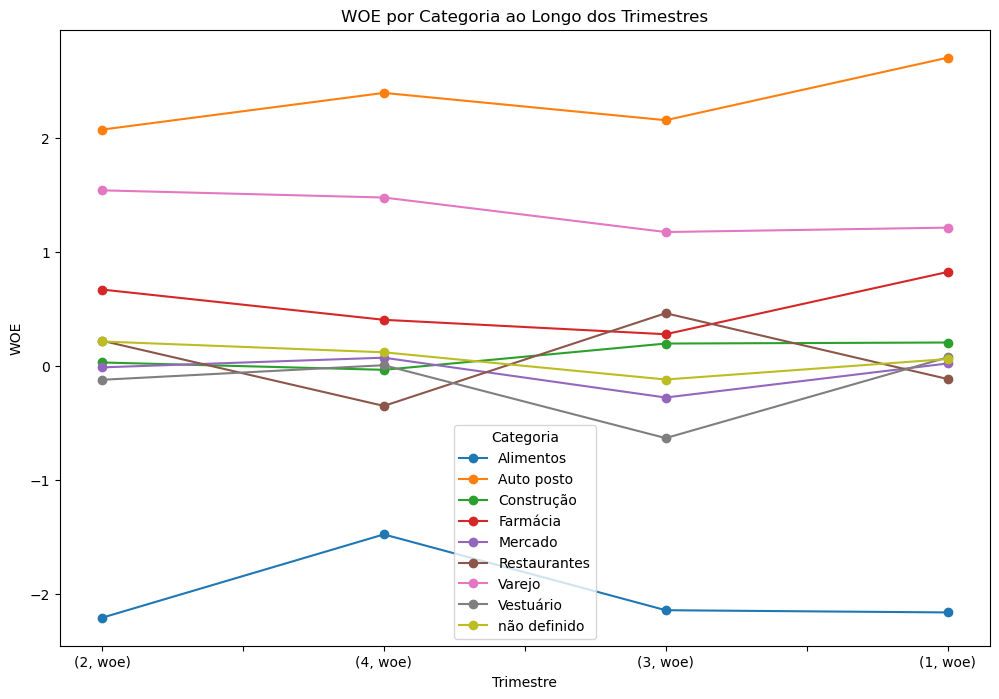

In [21]:
# Plotando o WOE ao longo dos trimestres para cada categoria
plt.figure(figsize=(10, 6))
woe_df.T.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('WOE por Categoria ao Longo dos Trimestres')
plt.xlabel('Trimestre')
plt.ylabel('WOE')
plt.legend(title='Categoria')
plt.show()

<Figure size 1000x600 with 0 Axes>

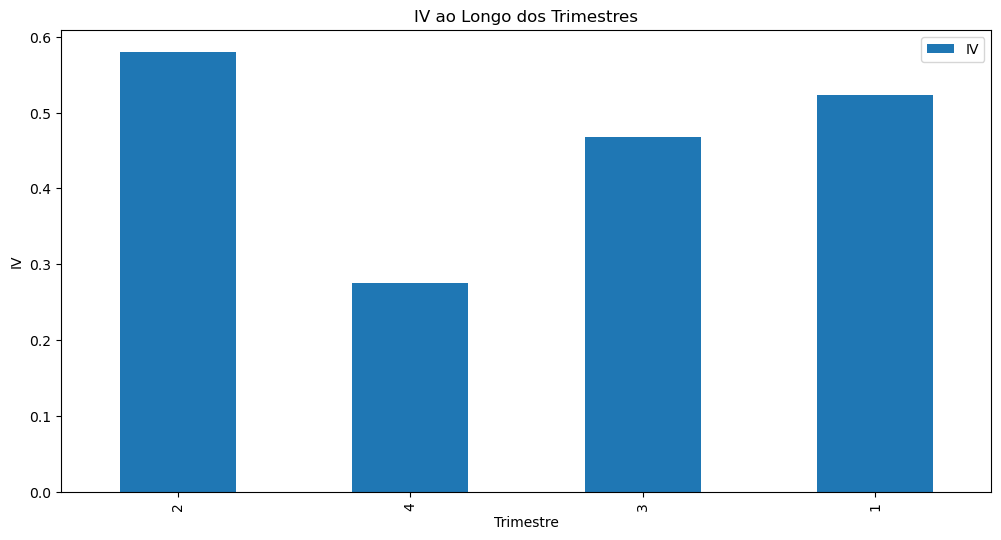

In [23]:
# Plotando o IV ao longo dos trimestres
plt.figure(figsize=(10, 6))
iv_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('IV ao Longo dos Trimestres')
plt.xlabel('Trimestre')
plt.ylabel('IV')
plt.show()

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

<Figure size 1200x800 with 0 Axes>

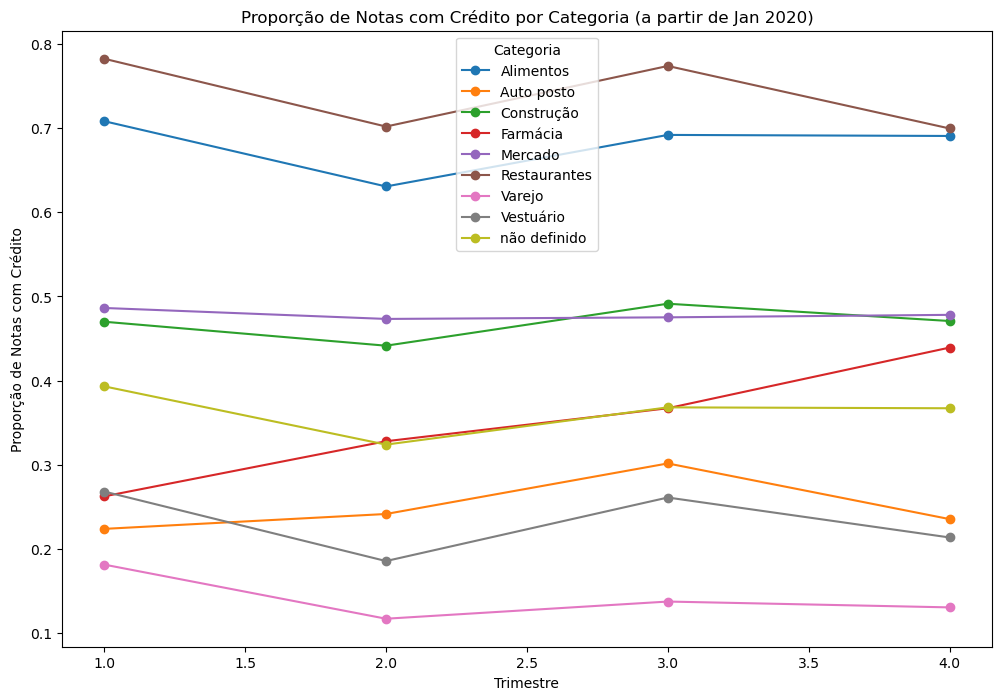

In [24]:
# Filtrando dados a partir de janeiro de 2020
dados_recente = dados[dados['Data Emissão'] >= '2020-01-01']

# Calculando a proporção de notas com crédito por categoria ao longo dos trimestres
proporcao_credito_categoria_trimestre_recente = dados_recente.groupby(['trimestre', 'categoria'])['flag_credito'].mean().unstack()

# Plotando a proporção de notas com crédito por categoria ao longo dos trimestres recentes
plt.figure(figsize=(12, 8))
proporcao_credito_categoria_trimestre_recente.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Proporção de Notas com Crédito por Categoria (a partir de Jan 2020)')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.legend(title='Categoria')
plt.show()

In [25]:
# Analisando a variabilidade das proporções ao longo do tempo
variabilidade_proporcoes = proporcao_credito_categoria_trimestre_recente.std()

# Exibindo as categorias com maior e menor variabilidade
variabilidade_proporcoes.sort_values(ascending=False)

categoria
Farmácia        0.073971
Restaurantes    0.044865
Vestuário       0.039372
Auto posto      0.034792
Alimentos       0.034097
não definido    0.028764
Varejo          0.027843
Construção      0.020499
Mercado         0.005746
dtype: float64

As categorias Farmácia e Restaurantes apresentam as maiores flutuações na proporção de notas com crédito ao longo do tempo.

A análise de variabilidade indica que as categorias Farmácia, Restaurantes, e Vestuário têm a maior variabilidade nas proporções de notas com crédito.
Por outro lado, as categorias Mercado e Construção apresentam a menor variabilidade, indicando maior estabilidade ao longo do tempo.

Essas observações podem indicar que, após 2020, categorias como Farmácia e Restaurantes passaram por mudanças significativas que afetam a concessão de créditos, possivelmente devido a fatores externos como a pandemia. Por outro lado, Mercado manteve um comportamento mais consistente. 